In [1]:
import polars as pl
import seaborn as sns
import glob
import matplotlib.pyplot as plt

In [2]:
results_df = pl.DataFrame(
    schema={
        'Model': pl.String,
        'Eval_Task': pl.String,
        "Dataset": pl.String,
        "MRR": pl.Float64,
        "TKA": pl.Float64,
        "Time_Tot": pl.Float64,
        "Time_Query": pl.Float64,
        "Error_Count": pl.Int32
    })
results_df

Model,Eval_Task,Dataset,MRR,TKA,Time_Tot,Time_Query,Error_Count
str,str,str,f64,f64,f64,f64,i32


In [3]:
subset_queries = ['llm1', 'llm2', 'llm3', 'gold_ingredients', 'gold_key_ingredients']
adversarial_queries = ['added_prep_suffixes', 'gold_adversarial_ingredients', 'gold_adversarial_subset_ingredients']

In [4]:
for pn in glob.glob("../../../data/results/BOW/*") + glob.glob("../../../data/results/NER/*") + glob.glob("../../../data/results/SBERT/*"):
    print(pn)
    result_df = pl.read_parquet(pn)
    results_df = results_df.vstack(result_df)

../../../data/results/BOW/BOW_100k_2025_06_12__20_25.parquet
../../../data/results/BOW/BOW_10k_2025_06_12__16_55.parquet
../../../data/results/NER/prod_prep_100k_2025_06_12__15_24.parquet
../../../data/results/NER/prod_prep_var_10k_2025_06_12__21_51.parquet
../../../data/results/NER/prod_prep_alt_100k_2025_06_12__23_41.parquet
../../../data/results/NER/test_2025_06_12__21_49.parquet
../../../data/results/NER/prod_prep_alt_10k_2025_06_12__22_49.parquet
../../../data/results/NER/prod_prep_var_100k_2025_06_12__21_51.parquet
../../../data/results/NER/prod_prep_10k_2025_06_12__15_24.parquet
../../../data/results/SBERT/first_SBERT_2025_06_12__21_25.parquet


In [5]:
results_df = results_df.filter(pl.col('Dataset') == '100k')

In [6]:
subset_results = results_df.filter(pl.col('Eval_Task').is_in(subset_queries))
adversarial_results = results_df.filter(pl.col('Eval_Task').is_in(adversarial_queries))

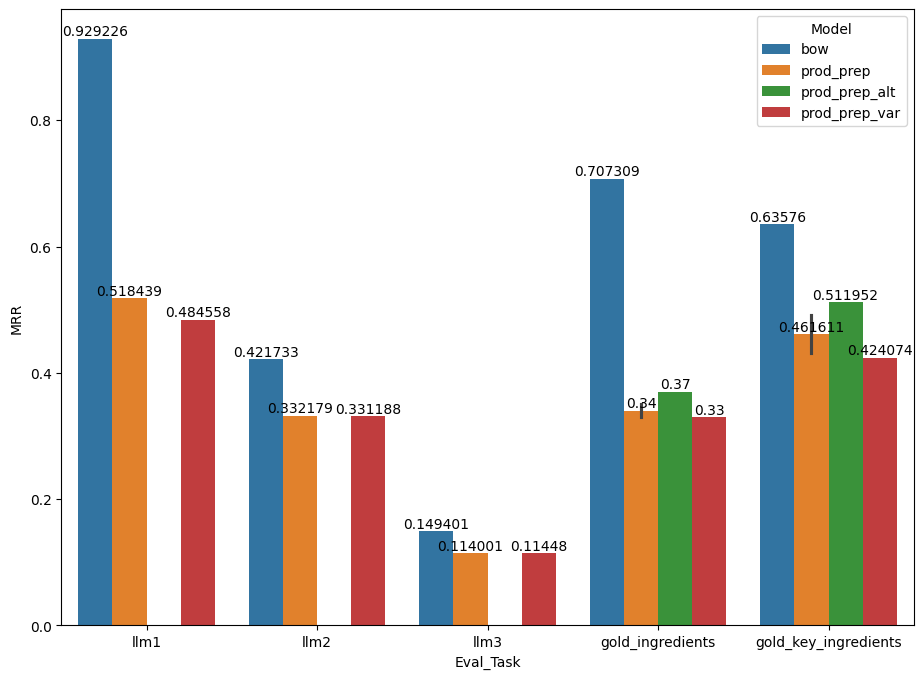

In [7]:
plt.figure(figsize=(11,8))
ax = sns.barplot(subset_results, x='Eval_Task', y='MRR', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

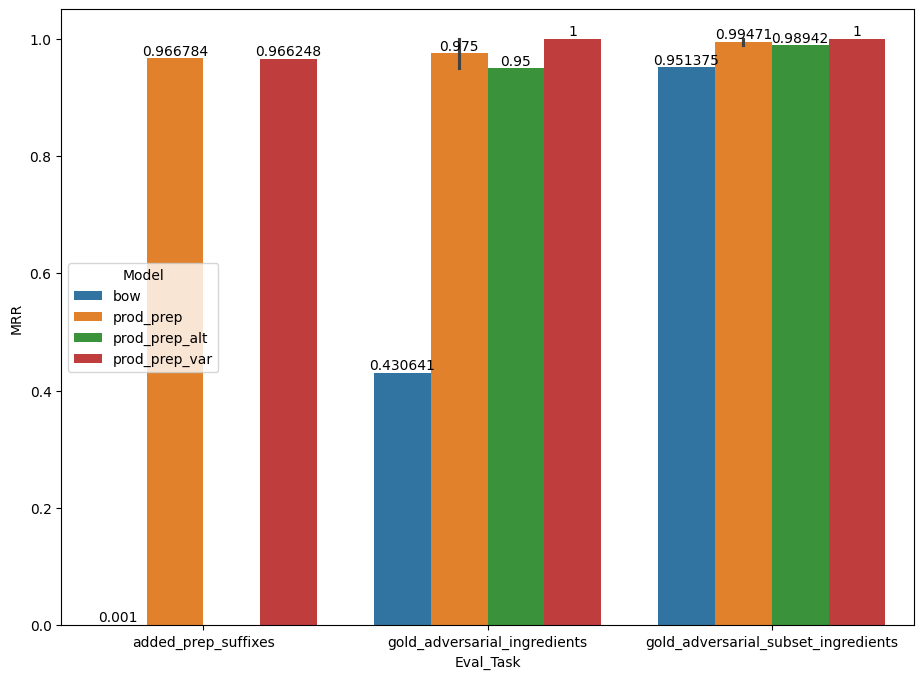

In [8]:
plt.figure(figsize=(11,8))
ax = sns.barplot(adversarial_results, x='Eval_Task', y='MRR', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

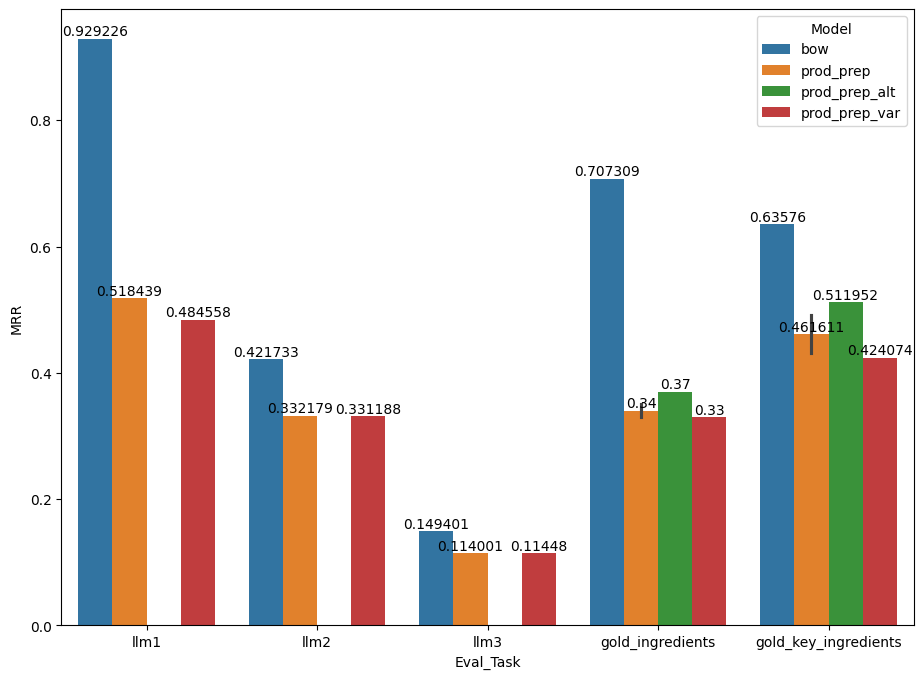

In [9]:
plt.figure(figsize=(11,8))
ax = sns.barplot(subset_results, x='Eval_Task', y='MRR', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

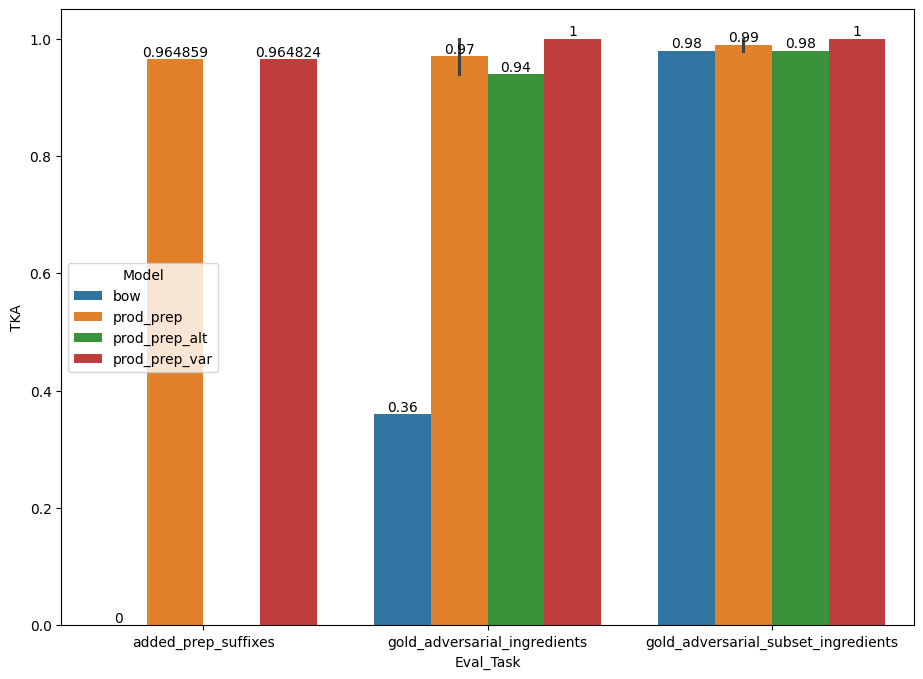

In [10]:
plt.figure(figsize=(11,8))
ax = sns.barplot(adversarial_results, x='Eval_Task', y='TKA', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

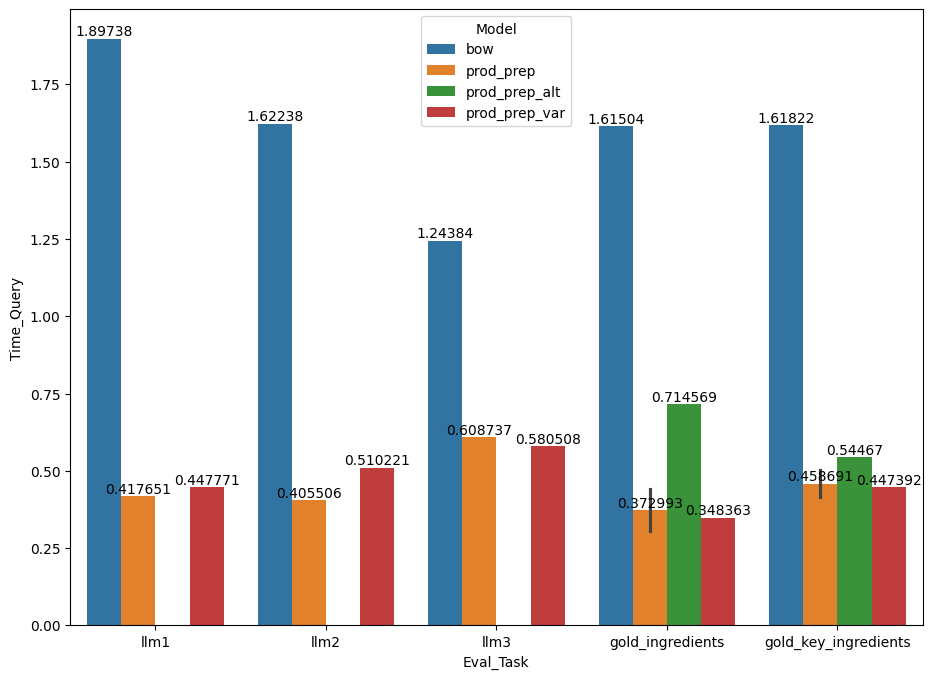

In [11]:
plt.figure(figsize=(11,8))
ax = sns.barplot(subset_results, x='Eval_Task', y='Time_Query', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

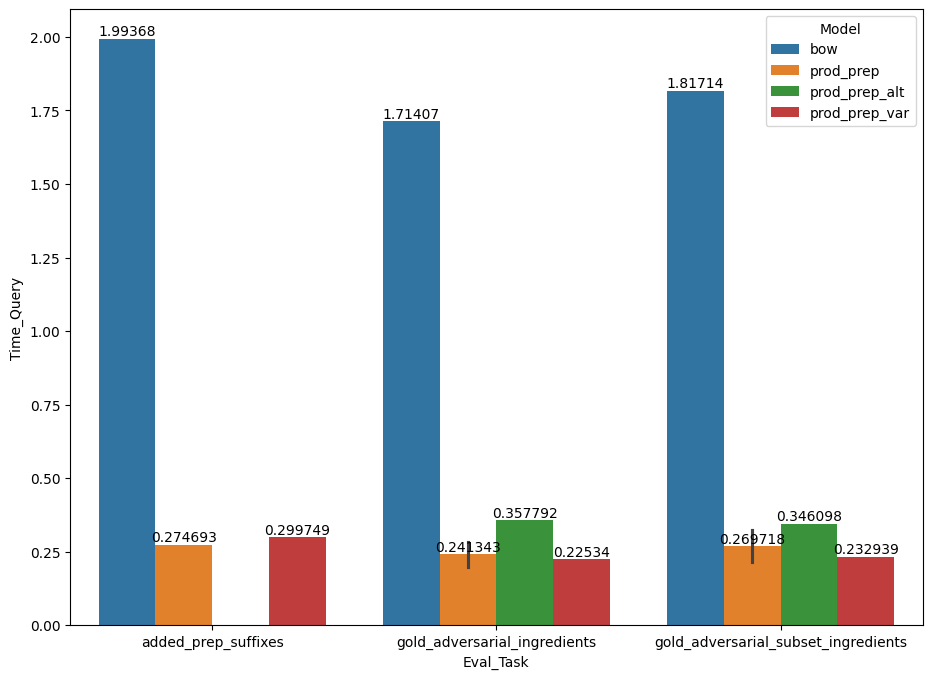

In [12]:
plt.figure(figsize=(11,8))
ax = sns.barplot(adversarial_results, x='Eval_Task', y='Time_Query', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

In [13]:
subset_results.filter(pl.col('Model') == 'prod_prep_alt').select(pl.mean("TKA"), pl.mean("MRR"))

TKA,MRR
f64,f64
0.48,0.440976


In [14]:
adversarial_results.filter(pl.col('Model') == 'prod_prep_alt').select(pl.mean("TKA"), pl.mean("MRR"))

TKA,MRR
f64,f64
0.96,0.96971


In [15]:
results_df.filter(pl.col('Model') == 'prod_prep_alt').select(1 / pl.mean("Time_Query"))

literal
f64
2.037564
